In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , f1_score , precision_score , recall_score , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
data = pd.read_csv('C:\\Users\\DELL\\Downloads\\loan_prediction.csv')
data.shape

(614, 13)

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dropna(inplace=True , axis=0)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
data.shape

(480, 13)

In [13]:
print(data['Dependents'].unique())

['1' '0' '2' '3+']


In [14]:
data.replace('3+', '3' , inplace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
print(data['Dependents'].unique())

['1' '0' '2' '3']


In [26]:
data.corr

<bound method DataFrame.corr of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583          

ValueError: could not convert string to float: 'LP001003'

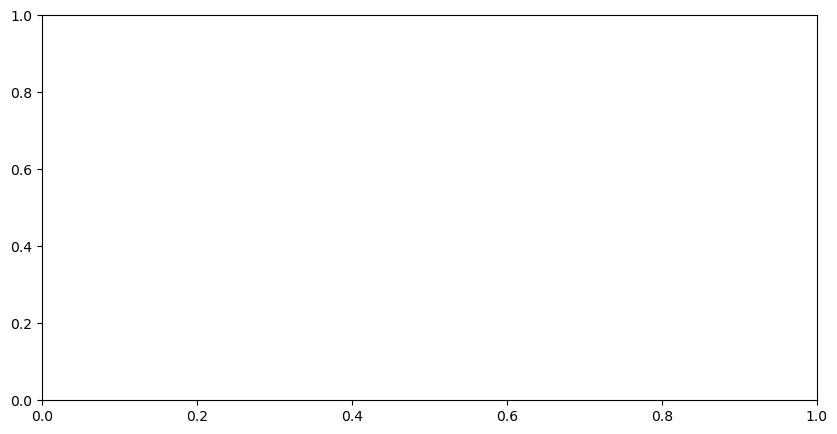

In [27]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr() , cmap='YlGnBu' , annot=True)
plt.show()

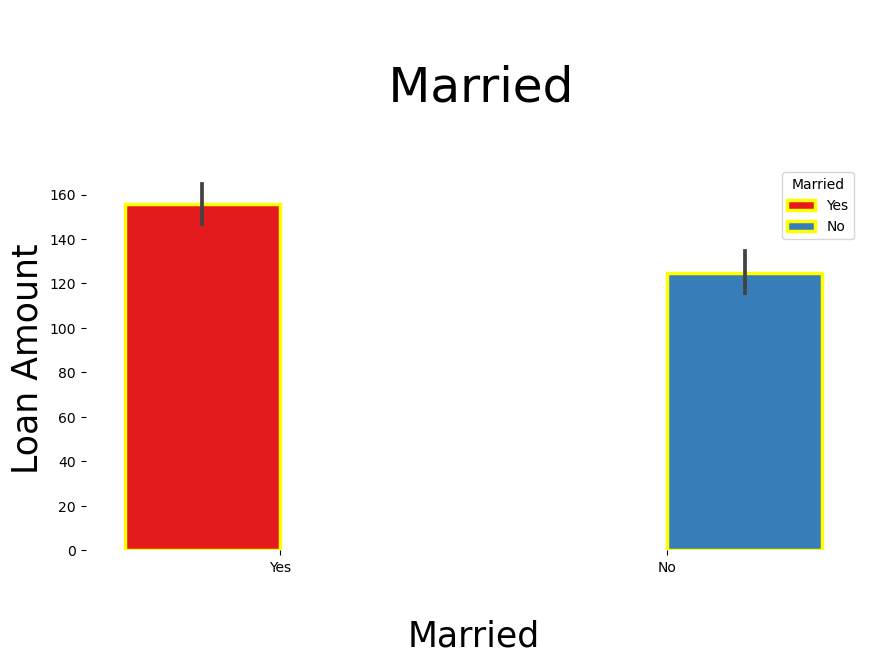

In [28]:
plt.subplots(figsize=(10,5))
p = sns.barplot(x=data["Married"],y=data["LoanAmount"],palette="Set1", saturation=2, edgecolor = "yellow", linewidth = 2.5,hue=data["Married"])
p.axes.set_title("\n Married\n", fontsize=35)
plt.ylabel("Loan Amount" , fontsize = 25)
plt.xlabel("\nMarried" , fontsize = 25)
# plt.yscale("log")
sns.despine(left=True, bottom=True)
plt.show()

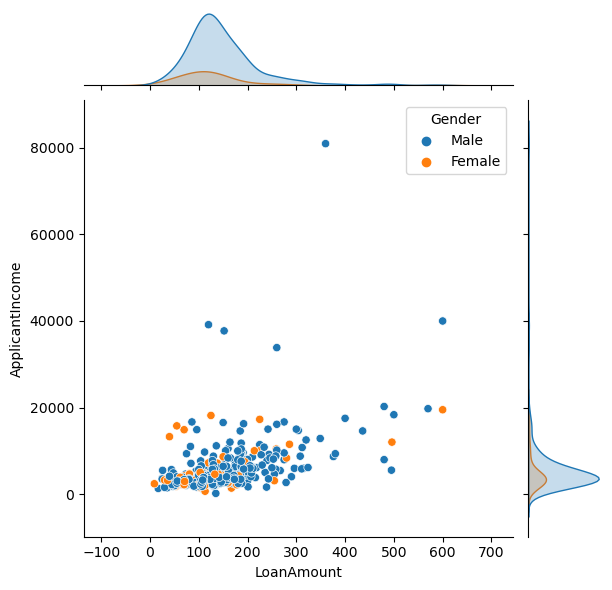

In [29]:
sns.jointplot(x='LoanAmount' , y = 'ApplicantIncome' , data=data , hue='Gender')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


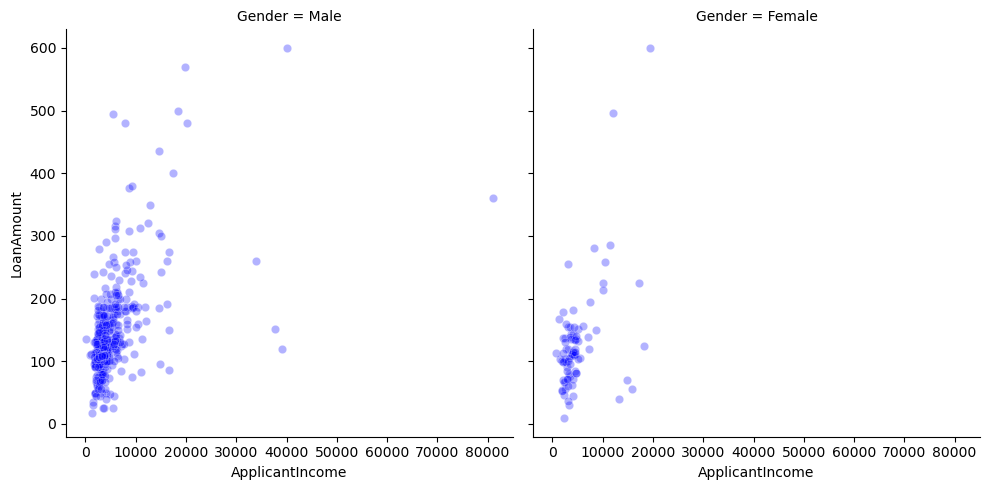

In [30]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=data, col="Gender",color="Blue",alpha=0.3)
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

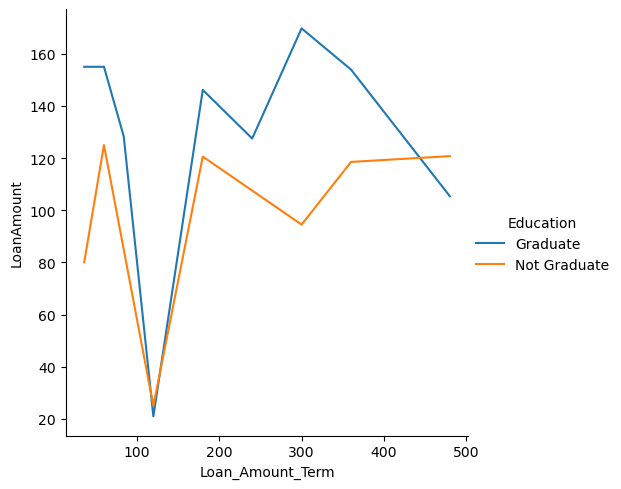

In [31]:
plt.figure(figsize=(15,7))
sns.relplot(x="Loan_Amount_Term", y="LoanAmount", data=data,kind="line",hue="Education" , ci=None)
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


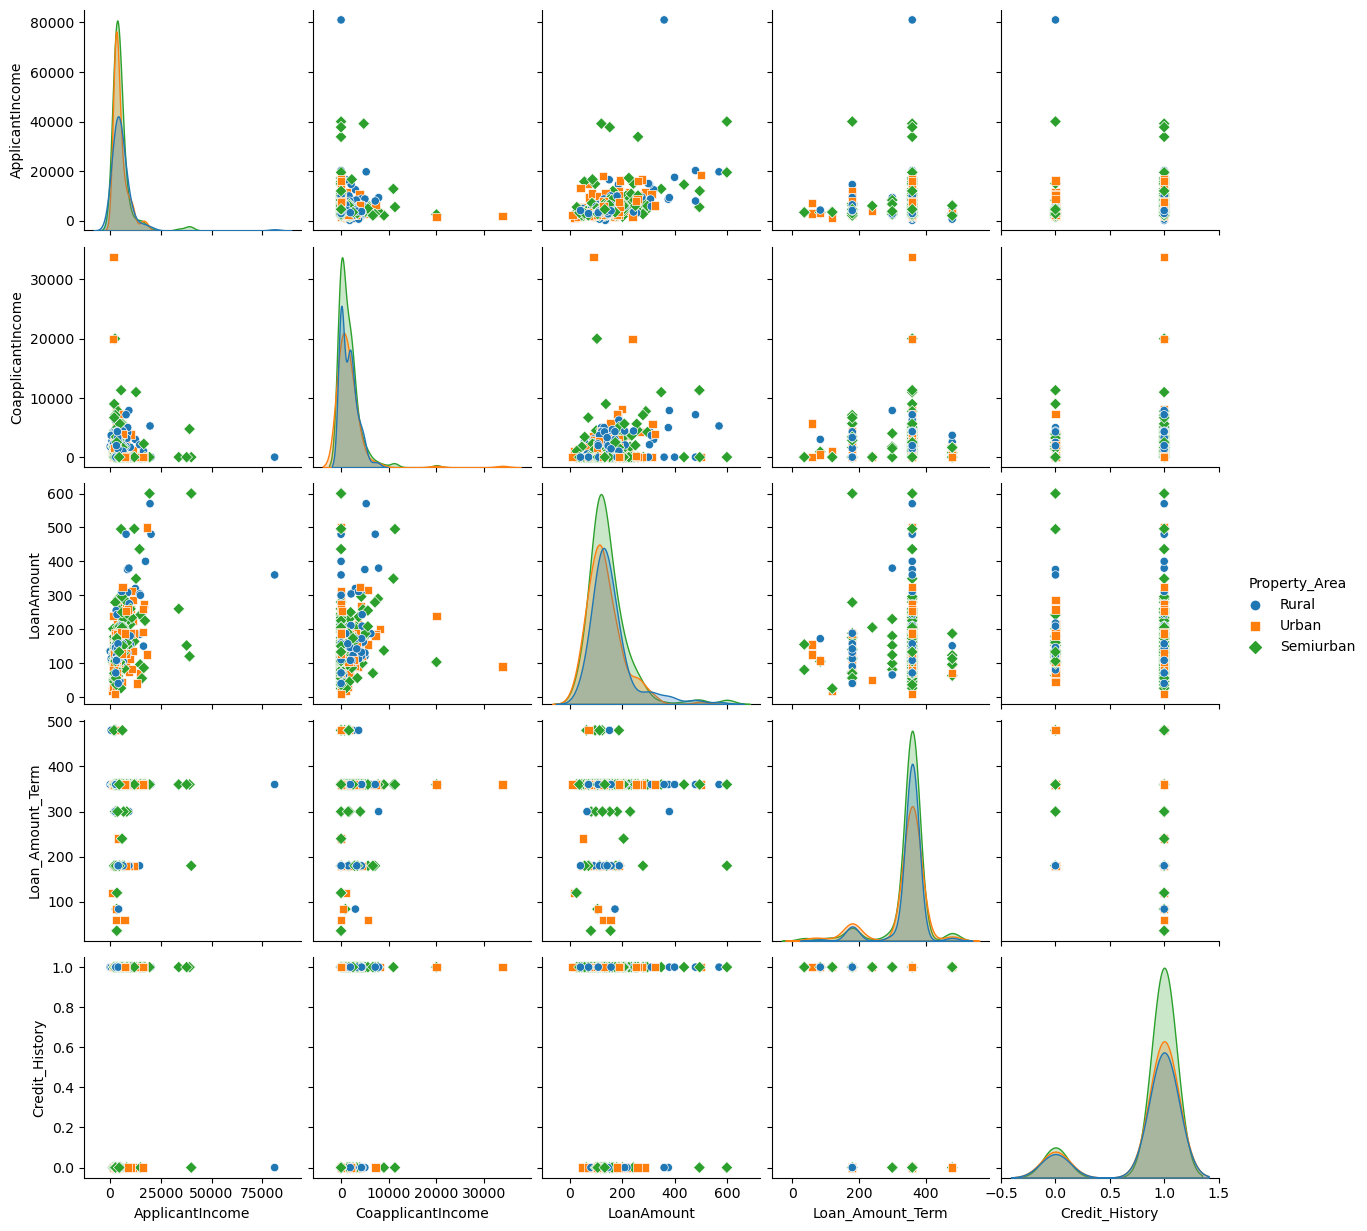

In [32]:
sns.pairplot(data , hue='Property_Area' , markers=["o", "s", "D"])
plt.show()

In [33]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Education'].unique())
print(data['Self_Employed'].unique())
print(data['Property_Area'].unique())
print(data['Loan_Status'].unique())

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


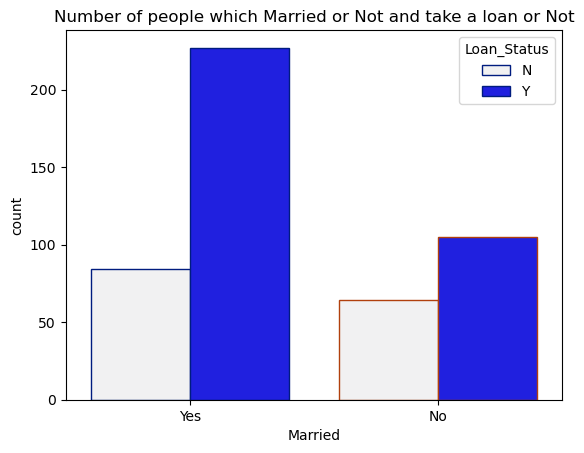

In [34]:
sns.countplot(x='Married' , data=data , hue = 'Loan_Status' , color='Blue', edgecolor=sns.color_palette("dark", 2))
plt.title("Number of people which Married or Not and take a loan or Not")
plt.show()


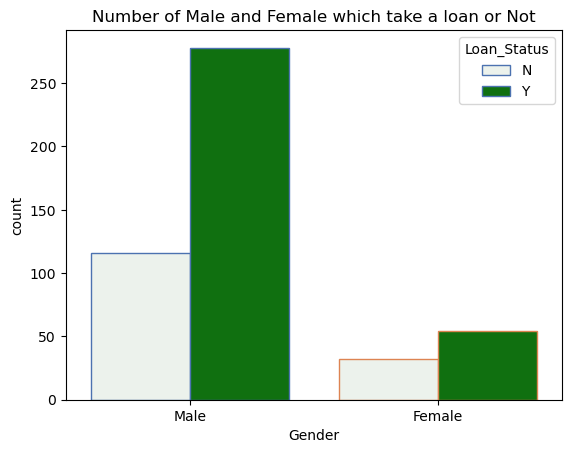

In [35]:
sns.countplot(x='Gender' , data=data , hue = 'Loan_Status' , color='green', edgecolor=sns.color_palette("deep", 2))
plt.title("Number of Male and Female which take a loan or Not")
plt.show()

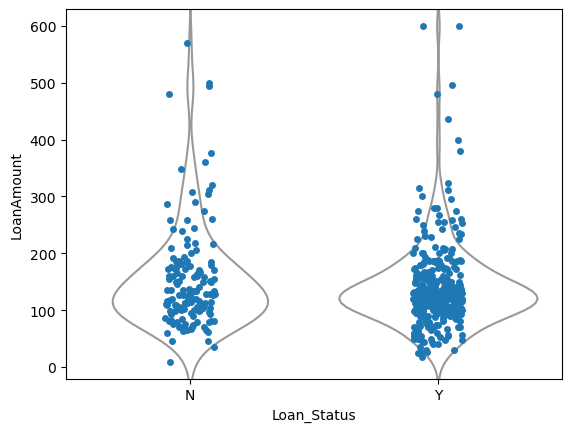

In [36]:
ax = sns.violinplot(x="Loan_Status", y="LoanAmount", data=data,inner=None, color="1")
ax = sns.stripplot(x="Loan_Status", y="LoanAmount", data=data)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

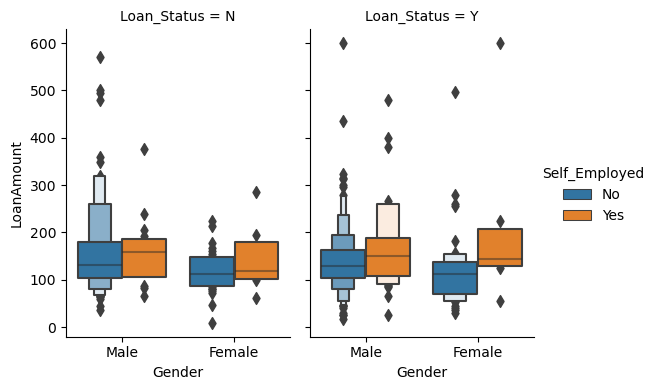

In [37]:
plt.figure(figsize=(16,5))
g = sns.catplot(x="Gender", y="LoanAmount", hue="Self_Employed", col="Loan_Status",data=data, kind="boxen", height=4, aspect=.7)
plt.show()

In [38]:
data.replace({'Gender':{'Male':1 , 'Female':0} , 'Married':{'Yes':1 , 'No':0} , 'Education':{'Graduate':1 , 'Not Graduate' : 0} , 
              'Self_Employed':{'Yes':1 , 'No':0} , 'Property_Area':{'Urban':2 , 'Semiurban':1 , 'Rural':0} , 'Loan_Status':{'Y':1 , 'N':0} } , inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


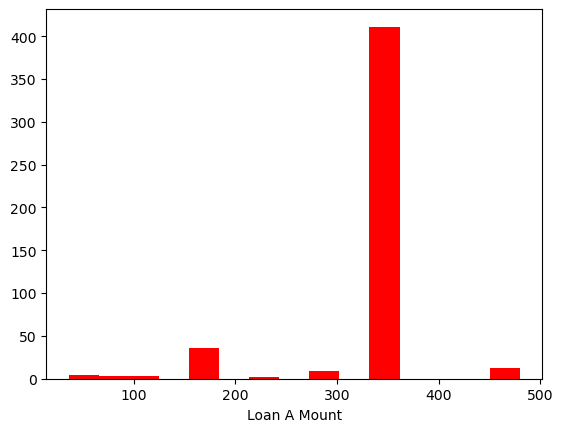

In [39]:
plt.hist(data['Loan_Amount_Term'] , bins=15 , color='r' )
plt.xlabel('Loan A Mount')
plt.show()

In [40]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
X = data.iloc[: ,1 :-1]
y = data.iloc[: , -1]
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True )
X_train.shape

(384, 11)

In [43]:
model = SVC(kernel='linear' , random_state=1 )
model.fit(X_train , y_train)
training_prediction = model.predict(X_train)

print("Score training_prediction : " , model.score(X_train , y_train) )
print("Accuracy Score training_prediction : " ,  accuracy_score(y_train , training_prediction) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

testing_prediction = model.predict(X_test)
print("Score testing_prediction : " , model.score(X_test , y_test) )
print("Accuracy Score training_prediction : " ,  accuracy_score(y_test , testing_prediction) )
print("******************************************************************")
print("Confusion Matrix for testing prediction : \n" , confusion_matrix(y_test , testing_prediction))
print("Precesion Value : model that detects mights be true ,and that's really true :-->  " , precision_score(y_test , testing_prediction))
print("recall value : The model measures what is true for all data :----->  " , recall_score(y_test , testing_prediction))
print("F1 Score : to determine which (precision or recall ) is true :--> " , f1_score(y_test , testing_prediction))

Score training_prediction :  0.796875
Accuracy Score training_prediction :  0.796875
******************************************************************
******************************************************************
******************************************************************
Score testing_prediction :  0.8125
Accuracy Score training_prediction :  0.8125
******************************************************************
Confusion Matrix for testing prediction : 
 [[10 18]
 [ 0 68]]
Precesion Value : model that detects mights be true ,and that's really true :-->   0.7906976744186046
recall value : The model measures what is true for all data :----->   1.0
F1 Score : to determine which (precision or recall ) is true :-->  0.8831168831168831


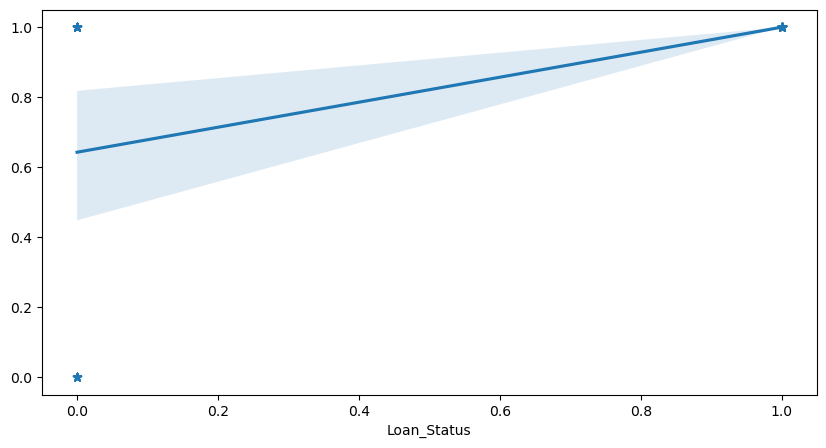

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
sns.regplot(x=y_test,y=testing_prediction,marker="*")
plt.show()


In [45]:
df = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction})
df.head()

,Acutal,predicted
92,1,1
529,1,1
505,1,1
358,0,0
512,1,1


In [46]:
svm_data_prediction = list(training_prediction) + list(testing_prediction)
data["svm Prediction result"] = svm_data_prediction
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,svm Prediction result
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,1


In [ ]:
# test SVC linear model

In [47]:
sub1 = (1,1,2,1,0,11417,1126,225,360,1,2)
sub1 = np.asarray(sub1).reshape(1,-1)

sub2 = (0,0,0,1,0,10000,1666,225,360,1,0)
sub2 = np.asarray(sub2).reshape(1,-1)

pred_sub1 = model.predict(sub1)
pred_sub2 = model.predict(sub2)
print("SUB 1 : Acutal value for sub sample is (1) and predicted value : " , pred_sub1)
print("SUB 2 : Acutal value for sub sample is (0) and predicted value : " , pred_sub2)

SUB 1 : Acutal value for sub sample is (1) and predicted value :  [1]
SUB 2 : Acutal value for sub sample is (0) and predicted value :  [1]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True )
GNB = GaussianNB()
GNB.fit(X_train , y_train)
training_prediction_GNB = GNB.predict(X_train)

print("Accuracy Score training_prediction GNB : " ,  accuracy_score(y_train , training_prediction_GNB) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
testing_prediction_GNB = GNB.predict(X_test)
print("Accuracy Score testing_prediction GNB : " ,  accuracy_score(y_test , testing_prediction_GNB) )
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
df_GNB = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction_GNB})
df_GNB.head()

Accuracy Score training_prediction GNB :  0.7942708333333334
******************************************************************
******************************************************************
******************************************************************
Accuracy Score testing_prediction GNB :  0.8229166666666666
******************************************************************
******************************************************************
******************************************************************


,Acutal,predicted
92,1,1
529,1,1
505,1,1
358,0,0
512,1,1


In [50]:
GNB_data_prediction = list(training_prediction_GNB) + list(testing_prediction_GNB)
data["GNB Prediction result"] = GNB_data_prediction
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,svm Prediction result,GNB Prediction result
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,1,1


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42 , shuffle=True , stratify=y)

DTC = DecisionTreeClassifier(random_state=1 , max_depth=5, criterion="entropy")
DTC.fit(X_train , y_train)
training_prediction_DTC = DTC.predict(X_train)
print("Accuracy Score training_prediction DTC : " ,  accuracy_score(y_train , training_prediction_DTC) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
testing_prediction_DTC = DTC.predict(X_test)
print("Accuracy Score testing_prediction DTC : " ,  accuracy_score(y_test , testing_prediction_DTC) )

print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

df_DTC = pd.DataFrame(data={'Acutal ':y_test , 'predicted ':testing_prediction_DTC})
df_DTC.head()

Accuracy Score training_prediction DTC :  0.8541666666666666
******************************************************************
******************************************************************
******************************************************************
Accuracy Score testing_prediction DTC :  0.7604166666666666
******************************************************************
******************************************************************
******************************************************************


,Acutal,predicted
244,1,1
580,1,1
603,1,1
58,1,1
538,0,1


In [55]:
DTC_data_prediction = list(training_prediction_DTC) + list(testing_prediction_DTC)
data["DTC Prediction result"] = DTC_data_prediction
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,svm Prediction result,GNB Prediction result,DTC Prediction result
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,1
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,1,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,1,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,1,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,1,1,0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,1,1,0
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,1,1,1
